# Feature Extraction
## Pandas

In [1]:
import pandas as pd

In [2]:
df_large = pd.read_csv("./../assets/data_large.csv", index_col = 0)

In [3]:
df_large.sample(10)

,city,searched_zipcode,url,content
29496,Dallas,75211,https://dallas.craigslist.org/ftw/res/d/profes...,My name Is Brian and I am a professional paint...
25618,Sacramento,95823,https://sfbay.craigslist.org/sfc/res/d/fashion...,"Expertise in Trend Forecasting, Creative Conce..."
29438,Dallas,75211,https://austin.craigslist.org/res/d/build-bran...,1 STOP SHOP FOR MANY SMALL BUSINESSES ON A TIG...
11038,Dallas,75217,https://dallas.craigslist.org/ftw/res/d/lookin...,I am trying to make some extra cash. I am curr...
9150,NewYork,10025,https://baltimore.craigslist.org/res/d/license...,Armed security agent looking for hire in Balti...
9580,NewYork,10025,https://baltimore.craigslist.org/res/d/kayla-s...,*TRAVELING MODEL*\n\nHello! Internationally pu...
14365,NewYork,10002,https://southjersey.craigslist.org/res/d/doors...,Interior-Exterior door installation of any sor...
19440,Fresno,93722,https://goldcountry.craigslist.org/res/d/affor...,Flexible schedule and affordable services. I h...
13542,Bakersfield,93307,https://ventura.craigslist.org/res/d/hvac-sale...,Responsibilities and duties:\n\n• Responsible ...
27136,Atlanta,30349,https://atlanta.craigslist.org/atl/res/d/entry...,"Detail oriented, analytical professional seeki..."


In [4]:
df_large.shape

(38912, 4)

### .loc([*condition*])
`.loc([condition])` can be used to filter the dataframe

In [5]:
new_york_df = df_large.loc[df_large['city'] == 'NewYork']
new_york_df.head(10)

,city,searched_zipcode,url,content
7708,NewYork,10025,https://allentown.craigslist.org/res/d/windows...,"Replacement Windows, Window Capping, Painting...."
7709,NewYork,10025,https://newyork.craigslist.org/jsy/res/d/remot...,*$30 per hour - remote work only\n\n*8 Years D...
7710,NewYork,10025,https://worcester.craigslist.org/res/d/meat-cu...,I'm looking to be trained as a meat cutter. I ...
7711,NewYork,10025,https://baltimore.craigslist.org/res/d/man-of-...,Local Christian man seeking employment and/or ...
7712,NewYork,10025,https://philadelphia.craigslist.org/res/d/hand...,"When it comes to fast, quality work home impro..."
7713,NewYork,10025,https://philadelphia.craigslist.org/res/d/hand...,"When it comes to fast, quality work home impro..."
7714,NewYork,10025,https://philadelphia.craigslist.org/res/d/hand...,When it comes to cheaper and quality work call...
7715,NewYork,10025,https://philadelphia.craigslist.org/res/d/hand...,"When it comes to fast, quality work home impro..."
7716,NewYork,10025,https://philadelphia.craigslist.org/res/d/gig-...,My freelance brand as a worker for hire:\nMy n...
7717,NewYork,10025,https://southjersey.craigslist.org/res/d/dj-lo...,I have been DJiing over 15 years and i am look...


### .nunique()
`.nunique()` can be used to count the number of unique items in each column.

In [6]:
# Count number of unique information in each column
new_york_df.nunique()

city                   1
searched_zipcode       3
url                 3027
content             2769
dtype: int64

In [7]:
# Get the shape of the data (row, columns)
new_york_df.shape

(9000, 4)

### .drop_duplicates()
`.drop_duplicates()` drops duplicate rows in the dataframe. Parameters can be modified to specify which rows to drop such as `subset` to specify which columns to check for duplicates and `keep` to specify which data point of the duplicates will be kept.

In [8]:
no_duplicate_shape = new_york_df.drop_duplicates(subset='content', keep = 'first').shape
print(f"Shape of no duplicates in content column {no_duplicate_shape}")
new_york_df.drop_duplicates(subset='content', keep = 'first').head()

# It is important to note that .drop_duplicates() doesn't change the original data unless
# the parameter 'inplace' is set to 'True'

Shape of no duplicates in content column (2769, 4)


,city,searched_zipcode,url,content
7708,NewYork,10025,https://allentown.craigslist.org/res/d/windows...,"Replacement Windows, Window Capping, Painting...."
7709,NewYork,10025,https://newyork.craigslist.org/jsy/res/d/remot...,*$30 per hour - remote work only\n\n*8 Years D...
7710,NewYork,10025,https://worcester.craigslist.org/res/d/meat-cu...,I'm looking to be trained as a meat cutter. I ...
7711,NewYork,10025,https://baltimore.craigslist.org/res/d/man-of-...,Local Christian man seeking employment and/or ...
7712,NewYork,10025,https://philadelphia.craigslist.org/res/d/hand...,"When it comes to fast, quality work home impro..."


### .unique()
`.unique()` returns a list of unique items in a Pandas Series.

In [9]:
# Get the unique values in searched_zipcode
new_york_df['searched_zipcode'].unique()

array([10025, 10002, 10029])

### .groupby()
`.groupby()` groups the dataframe based on a certain feature. It needs to be paired with another function such as `.sum()` or `.count()`. The parameter `by` takes in a string or list. If it's a list, the order of features matters.

In [10]:
# .groupby() alone doesn't help
df_large.groupby(by = ['city'])

In [11]:
# Group by city and then searched_zipcode
df_large.groupby(by = ['city', 'searched_zipcode']).count()

url  content
city        searched_zipcode               
Albuquerque 87121              145      145
Atlanta     30349             1039     1039
Bakersfield 93307             2462     2462
Brownsville 78521              133      133
Charlotte   28269             1311     1311
Chicago     60617             1005     1005
            60618              994      994
            60625              993      993
            60629             1004     1004
            60647              994      994
Dallas      75211             1159     1159
            75217             1143     1143
ElPaso      79912               92       92
            79936               92       92
Fresno      93722             1667     1667
Houston     77036             1193     1193
            77083             1190     1190
            77084             1197     1197
Lancaster   93535                6        6
LasVegas    89110              501      501
LosAngeles  90011             2641     2641
            90044             2641     2641
Nashville   37211              673      673
NewYork     10002             3000     3000
            10025             3000     3000
            10029             3000     3000
Sacramento  95823             1482     1482
SanDiego    92154             2473     2473
Yuma        85364             1682     1682

In [12]:
# Group by searched_zipcode then city
df_large.groupby(by = ['searched_zipcode', 'city']).count()

,,url,content
searched_zipcode,city,,
10002,NewYork,3000,3000
10025,NewYork,3000,3000
10029,NewYork,3000,3000
28269,Charlotte,1311,1311
30349,Atlanta,1039,1039
37211,Nashville,673,673
60617,Chicago,1005,1005
60618,Chicago,994,994
60625,Chicago,993,993


This example doesn't make sense because we know that each zip code only pertains to one city. However, it is important if you want to show certain relationships of features that don't depend on each other. If you have a dataset of vehicle registration, you can present the data grouped by `city` then `car model` to see what models are popular in certain cities or grouped by `car model` then `city` to see what city has a higher count of certain car model.

# Handling Text Data
## Python String

In [13]:
import string
import re
import nltk

# Download nltk model if it doesn't exist
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/princemallari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now we take a look at how we can clean and work with text data. We'll start with the urls first to get a better understanding of how we can use python to handle text.

In [14]:
# Get 'random' url
sample_url = df_large['url'][42]
sample_url

'https://lascruces.craigslist.org/res/d/in-need-of-employment/6943802725.html'

### .split()
`.split()` splits the string based on the character inside the function. If left blank, it will split it based on white space.

In [15]:
# Split by white space
random_text = "My    \t\t\t\tname is    \n   Prince"
random_text.split()

['My', 'name', 'is', 'Prince']

In [16]:
# Split string based on the '/' character
url_split = sample_url.split('/')
url_split

['https:',
 '',
 'lascruces.craigslist.org',
 'res',
 'd',
 'in-need-of-employment',
 '6943802725.html']

The text of interest here is on the 3rd and 2nd to the last elements of the array.

In [17]:
domain_website = url_split[2]
type_of_employ = url_split[-2]

print(f"The website is '{domain_website}' and the type of employment is '{type_of_employ}'")

The website is 'lascruces.craigslist.org' and the type of employment is 'in-need-of-employment'


Now we need to parse the domain website to focus on the region the website is focused on. We can split the string based on the `/` character.

In [18]:
domain_split = domain_website.split('.')
domain_split

['lascruces', 'craigslist', 'org']

### Re
`re` is short for regex and it's a powerful tool in using regular expressions to extract data.

In [19]:
sample_url

'https://lascruces.craigslist.org/res/d/in-need-of-employment/6943802725.html'

In [20]:
re.findall("//(.*?).craigslist", sample_url)

['lascruces']

In [21]:
re.findall("/(.*?)/", sample_url)

['', 'res', 'in-need-of-employment']

Find specific characters inside a complicated string

In [22]:
random_text = "Hello123world324.<>$%@#T123..23.4.55,!"

In [23]:
# all numbers
re.findall('[0-9]+', random_text)

['123', '324', '123', '23', '4', '55']

In [24]:
# all lowercase letters
re.findall('[a-z]+', random_text)

['ello', 'world']

In [25]:
# all uppercase letters
re.findall('[A-Z]+', random_text)

['H', 'T']

In [26]:
# All letters
re.findall('[a-zA-Z]+', random_text)

['Hello', 'world', 'T']

In [27]:
# All alphanumeric characters
re.findall('[a-zA-Z0-9]+', random_text)

['Hello123world324', 'T123', '23', '4', '55']

In [28]:
# All punctuations
print(f"{string.punctuation}") # a nifty way of listing all punctuations
re.findall(f"[{string.punctuation}]+", random_text)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['.<>$%@#', '..', '.', '.', ',!']

And we can get the first item as our region.

Now it would be inefficient for us to run this one by one for each of our data points. We can use the `.map()` of the pandas dataframe to map a function to our dataset but we have to write out the function first. We'll write a function for getting the region, and we'll write a function that will get the type of employment.

In [29]:
def get_region(url):
    # Split the url based on the '/' character
    url_split = url.split('/')
    # Get the website string from the array
    domain_website = url_split[2]
    # Split the website string based on the '.' character
    domain_split = domain_website.split('.')
    # Get the region
    region = domain_split[0]
    # Return region
    return region

def get_type_employment(url):
    # Split the url based on the '/' character
    url_split = url.split('/')
    # Get the employment type
    employment_type = url_split[-2]
    # Return employment type
    return employment_type

In [30]:
# Test our function
print(sample_url)
print(f"Region: \t\t{get_region(sample_url)}")
print(f"Employment type: \t{get_type_employment(sample_url)}")

https://lascruces.craigslist.org/res/d/in-need-of-employment/6943802725.html
Region: 		lascruces
Employment type: 	in-need-of-employment


In [31]:
# Create a copy of the dataframe
df_large_copy = df_large

We can now create two new features for a dataset based on the data we extracted from the url.

In [32]:
# Map our function and assign the output to a new column
df_large_copy['region'] = df_large_copy['url'].map(get_region)
df_large_copy['type of employment'] = df_large_copy['url'].map(get_type_employment)
df_large_copy.head()

,city,searched_zipcode,url,content,region,type of employment
0,ElPaso,79936,https://elpaso.craigslist.org/res/d/profession...,Reliable well organized professional with stro...,elpaso,professional-talented-and-energetic
1,ElPaso,79936,https://elpaso.craigslist.org/res/d/outbound-r...,"ASIDE FROM WORD OF MOUTH OR FACE TO FACE , COL...",elpaso,outbound-retention-specialist
2,ElPaso,79936,https://elpaso.craigslist.org/res/d/looking-fo...,I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL W...,elpaso,looking-for-new-career-move-you-need
3,ElPaso,79936,https://elpaso.craigslist.org/res/d/im-looking...,"hola busco trabajo vivo para el east,me urge u...",elpaso,im-looking-for-work
4,ElPaso,79936,https://elpaso.craigslist.org/res/d/yard-work/...,Contact me to clean your yard today! Front and...,elpaso,yard-work


Let's try to take a look at the the content and see if we can extract unique informations from it.

In [170]:
# Get 'random' content
sample_content = df_large['content'][2]
sample_content

'I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL WRITER FROM UTEP\n\nIF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME\n\nLET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY\n\nMY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE\n\nSEND ME AN EMAIL YO GET YOU ON YOUR WAY'

We can try to split the content into sentences however, we know that '.' will not always work. There will be words that will have '.' with them such as 'Mr.', 'Ms.', 'Dr.', and more. We also notice some characters that don't make sense such `\n`. For this, we will rely with a popular python library called `nltk` which will help us parse the content into sentences and `re` for text regex.

`re` allows us to use regex expressions to substitute certain characters or phrases in our data. We can remove the `\n` using `re.sub()` function.

In [35]:
# re.sub(old_text, new_text, original_text)
# the "\n+" allows us to replace \n's that repeat multiple times consecutively.
# as you will notice, \n is repeated twice everytime it shows up but that doesn't necessarily happen
# to other data points

# remove next lines
clean = re.sub("\n+", ". ", sample_content)
# remove tabs
clean = re.sub("\t+", ". ", clean)
clean

'I DO BEST RESUMES IN TOWN.. I AM TECHNICAL WRITER FROM UTEP. IF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME. LET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY. MY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE. SEND ME AN EMAIL YO GET YOU ON YOUR WAY'

Alternatively, you can also use the string function `.replace()` but it doesn't give you as much flexibility as a regex function.

In [36]:
sample_content.replace('\n', '. ')

'I DO BEST RESUMES IN TOWN.. . I AM TECHNICAL WRITER FROM UTEP. . IF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME. . LET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY. . MY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE. . SEND ME AN EMAIL YO GET YOU ON YOUR WAY'

With the cleaned text, we can now parse the information to sentences. We use `nltk.sent_tokenize()` for this.

In [37]:
sentences = nltk.sent_tokenize(clean)
sentences

['I DO BEST RESUMES IN TOWN..',
 'I AM TECHNICAL WRITER FROM UTEP.',
 'IF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME.',
 'LET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY.',
 'MY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE.',
 'SEND ME AN EMAIL YO GET YOU ON YOUR WAY']

Notice, how our data is all in caps. We can modify the strings with several string functions such as `.lower()`, `.upper()`, or `.capitalize()`.

In [38]:
sample_sentence = "Mary and I often visit the nearby park."
print(f"Original: \t{sample_sentence}\n")
print(f"Lowercase: \t{sample_sentence.lower()}\n")
print(f"Uppercase: \t{sample_sentence.upper()}\n")
print(f"Capitalize: \t{sample_sentence.capitalize()}")

Original: 	Mary and I often visit the nearby park.

Lowercase: 	mary and i often visit the nearby park.

Uppercase: 	MARY AND I OFTEN VISIT THE NEARBY PARK.

Capitalize: 	Mary and i often visit the nearby park.


In some analysis, text is usually lowercased to have a standard format. When words are being grouped or counted, the program will not be able to distinguish `Hello` from `hello` or `hElLo`.

We can also split the text into words with nltk.

In [39]:
words = nltk.word_tokenize(clean)
words

['I',
 'DO',
 'BEST',
 'RESUMES',
 'IN',
 'TOWN..',
 'I',
 'AM',
 'TECHNICAL',
 'WRITER',
 'FROM',
 'UTEP',
 '.',
 'IF',
 'YOU',
 'WANT',
 'A',
 'NEW',
 'JOB',
 'OR',
 'CAREER',
 'CHANGE',
 'AND',
 'NOT',
 'GOING',
 'ANYWHERE',
 ',',
 'ITS',
 'NOT',
 'YOU',
 ',',
 'ITS',
 'YOUR',
 'RESUME',
 '.',
 'LET',
 'ME',
 'HELP',
 'YOU',
 'GET',
 'YOU',
 'NEW',
 'CAREER',
 'OPPORTUNITY',
 '.',
 'MY',
 'RESUMES',
 'ARE',
 'NOT',
 'GENERIC',
 ',',
 'ALL',
 'PROFESSIONAL',
 'AND',
 'TECHNICAL',
 'WRITING',
 'ONE',
 '.',
 'SEND',
 'ME',
 'AN',
 'EMAIL',
 'YO',
 'GET',
 'YOU',
 'ON',
 'YOUR',
 'WAY']

Let's write a function that will apply regex functions as well as turn the text to lowercase.

In [40]:
def clean_text(text):
    # remove next lines
    clean_text = re.sub("\n+", ". ", text)
    # remove tabs
    clean_text = re.sub("\t+", ". ", clean_text)
    # lowercase text
    clean_text = clean_text.lower()
    
    return clean_text

Then we'll map that function.

In [41]:
df_large_copy['clean_content'] = df_large_copy['content'].map(clean_text)
df_large_copy.head()

,city,searched_zipcode,url,content,region,type of employment,clean_content
0,ElPaso,79936,https://elpaso.craigslist.org/res/d/profession...,Reliable well organized professional with stro...,elpaso,professional-talented-and-energetic,reliable well organized professional with stro...
1,ElPaso,79936,https://elpaso.craigslist.org/res/d/outbound-r...,"ASIDE FROM WORD OF MOUTH OR FACE TO FACE , COL...",elpaso,outbound-retention-specialist,"aside from word of mouth or face to face , col..."
2,ElPaso,79936,https://elpaso.craigslist.org/res/d/looking-fo...,I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL W...,elpaso,looking-for-new-career-move-you-need,i do best resumes in town.. i am technical wri...
3,ElPaso,79936,https://elpaso.craigslist.org/res/d/im-looking...,"hola busco trabajo vivo para el east,me urge u...",elpaso,im-looking-for-work,"hola busco trabajo vivo para el east,me urge u..."
4,ElPaso,79936,https://elpaso.craigslist.org/res/d/yard-work/...,Contact me to clean your yard today! Front and...,elpaso,yard-work,contact me to clean your yard today! front and...


In [42]:
# Rearrange the columns
df_large_copy = df_large_copy.reindex(columns=['city','searched_zipcode',
                                               'url','region','type of employment', 
                                               'content', 'clean_content'])
df_large_copy.head()

,city,searched_zipcode,url,region,type of employment,content,clean_content
0,ElPaso,79936,https://elpaso.craigslist.org/res/d/profession...,elpaso,professional-talented-and-energetic,Reliable well organized professional with stro...,reliable well organized professional with stro...
1,ElPaso,79936,https://elpaso.craigslist.org/res/d/outbound-r...,elpaso,outbound-retention-specialist,"ASIDE FROM WORD OF MOUTH OR FACE TO FACE , COL...","aside from word of mouth or face to face , col..."
2,ElPaso,79936,https://elpaso.craigslist.org/res/d/looking-fo...,elpaso,looking-for-new-career-move-you-need,I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL W...,i do best resumes in town.. i am technical wri...
3,ElPaso,79936,https://elpaso.craigslist.org/res/d/im-looking...,elpaso,im-looking-for-work,"hola busco trabajo vivo para el east,me urge u...","hola busco trabajo vivo para el east,me urge u..."
4,ElPaso,79936,https://elpaso.craigslist.org/res/d/yard-work/...,elpaso,yard-work,Contact me to clean your yard today! Front and...,contact me to clean your yard today! front and...


We can save the file to csv format with `.to_csv` function

In [43]:
df_large_copy.to_csv("./../assets/data_large_clean.csv")

# Bonus Stuff:

## Sentiment Analysis with TextBlob
Sentiment analysis whether the text is positive(1.0) or negative(-1.0).

In [44]:
from textblob import TextBlob

In [45]:
positive_text = "The movie was great."
negative_text = "The movie seat was dirty."

In [46]:
TextBlob(positive_text).sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [47]:
TextBlob(negative_text).sentiment

Sentiment(polarity=-0.6, subjectivity=0.8)

In [149]:
def get_sentiment(text):
    polarity, subjectivity = TextBlob(text).sentiment
    print(text)
    print(f"Polarity = {polarity:.2f}")
    print(f"Subjectivity = {subjectivity:.2f}")
    print("___")

In [150]:
get_sentiment("This taco")
get_sentiment("This taco is")
get_sentiment("This taco is disgusting")
get_sentiment("This taco is disgustingly good")

This taco
Polarity = 0.00
Subjectivity = 0.00
___
This taco is
Polarity = 0.00
Subjectivity = 0.00
___
This taco is disgusting
Polarity = -1.00
Subjectivity = 1.00
___
This taco is disgustingly good
Polarity = 0.70
Subjectivity = 0.60
___


Not always correct but is useful.

## Wordcloud

The more a word appears in a document, the bigger and bolder the word appears in the Wordcloud.

In [166]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

sample_idx = 300
text = df_large_copy['clean_content'].iloc[sample_idx]
wordcloud = WordCloud().generate(text)

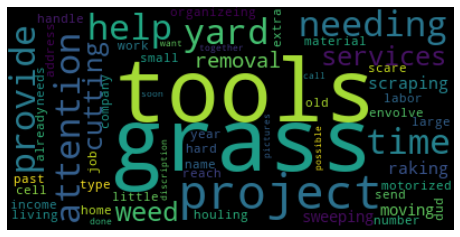

Original Text:
is your yard needing some attention? you have you tools but not the time? i can help.. i provide the services below.. -grass cutting. -weed and grass removal. -scraping. -raking. -sweeping. -moving. -organizeing. i my only handle small projects that don't envolve motorized tools or houling material of any type.. i'm a 20 year old dud that needs a little extra income. i already have a job, this isn't what i do for a living, however i have in the past for a large company. hard labor work does not scare me, send me your name home address a cell number i can reach you at together with the discription of what you want done and pictures of the project.. and i'll call you as soon as possible.


In [167]:
plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print(f"Original Text:\n{text}")

In [169]:
# The 'not-so-pretty' version
sample_paragraph    = text
# Remove non alphanumeric text
cleaned_paragraph   = re.sub('[^0-9a-zA-Z]+', ' ', sample_paragraph)
# Tokenize the text
tokenized_paragraph = nltk.word_tokenize(cleaned_paragraph)
# Print the 10 most common words and their frequency
for word, count in Counter(tokenized_paragraph).most_common(10):
    print(f"{word}\t\t{count} times")

i		9 times
a		6 times
you		5 times
the		5 times
have		3 times
and		3 times
of		3 times
your		2 times
tools		2 times
not		2 times


Notice how wordcloud also removes stop words